In [31]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# import jupyter module
from computeCost import computeCost
from gradientDescent import gradientDescent

importing Jupyter notebook from computeCost.ipynb
importing Jupyter notebook from gradientDescent.ipynb


# ======================= Part 2: Plotting =======================

Text(0, 0.5, 'Profit in $10,000s')

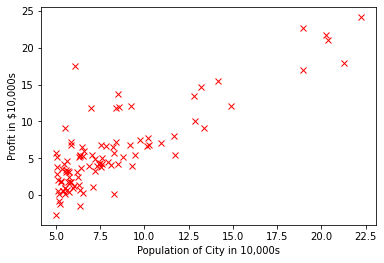

In [3]:
data = np.loadtxt('hw_desc/ex1data1.txt', delimiter = ',', usecols=(0, 1))
x = data[:, 0]
y = data[:, 1]
m = x.size

plt.plot(x, y, 'xr')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [6]:
X = np.c_[np.ones(m), data[:, 0]] # add a column of ones to x
theta = np.zeros([2, 1]) # initialize fitting parameters

iterations = 1500;
alpha = 0.01;

# compute and display initial cost
J = computeCost(X, y, theta)
# Compute and display initial cost
print('Initial cost : ' + str(J) + ' (This value should be about 32.07)')


Initial cost : 32.072733877455676 (This value should be about 32.07)
Expected theta values -3.6303 1.1664
My answer: [[-3.63029144]
 [ 1.16636235]]


# =================== Part 3: Gradient descent ===================

In [15]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Expected theta values -3.6303 1.1664")
print("My answer:", theta)

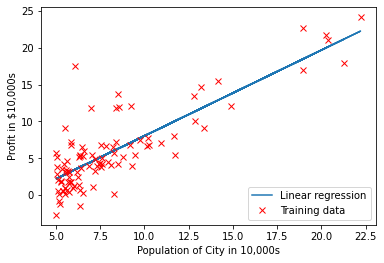

In [13]:
# plot the linear fit
plt.plot(x, np.dot(X, theta), label='Linear regression')
plt.plot(x, y, 'xr', label='Training data')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')

In [20]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta);

print('For population = 35,000, we predict a profit of %f' % (predict1*10000));
predict2 = np.dot([1, 7], theta);
print('For population = 70,000, we predict a profit of %f' % (predict2*10000));


[0.45197679]
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


# ============= Part 4: Visualizing J(theta_0, theta_1) =============

In [39]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals
J_vals = np.zeros((np.size(theta0_vals, 0), np.size(theta1_vals, 0)))

# fill out J_vals
for i in range(np.size(theta0_vals, 0)):
    for j in range(np.size(theta1_vals, 0)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = computeCost(X, y, t)

D:\DEEPSTUDY\anacoda\anacoda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


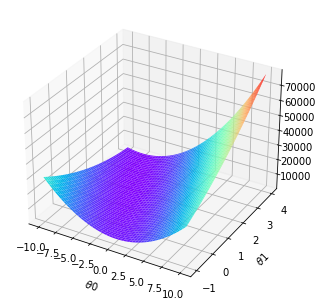

In [47]:
# Surface plot
Xtheta0, Ytheta1 = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(Xtheta0, Ytheta1, J_vals, cmap=plt.get_cmap('rainbow'))
ax.set_xlabel(r'$\theta$0')
ax.set_ylabel(r'$\theta$1')
plt.show()

D:\DEEPSTUDY\anacoda\anacoda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


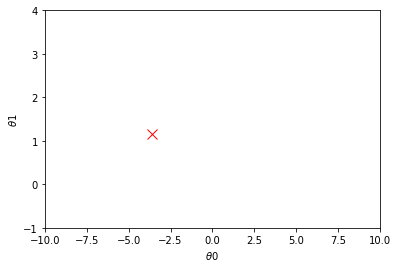

In [50]:
# Contour plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(Xtheta0, Ytheta1, J_vals, np.logspace(-2, 3, 20))
ax2.plot(theta[0], theta[1], 'rx', ms=10, lw=2)
ax2.set_xlabel(r'$\theta$0')
ax2.set_ylabel(r'$\theta$1')
plt.show()